<a href="https://colab.research.google.com/github/amritavarshini04/Finlatics_ml_projects/blob/main/Case_project_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_excel('advertising_sales_data.xlsx')

Display the basics

In [7]:
print('First few rows: ')
print(df.head())

First few rows: 
  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9


Check for the missing values

In [8]:
print(df.isnull().sum())
df.fillna(df.mean(numeric_only=True),inplace=True)

Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64


Check if any missing values still there

In [9]:
print(df.isnull().sum())

Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


Summary

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Campaign   200 non-null    object 
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB
None


Average TV advertising spend

In [26]:
avg_tv = df['TV'].mean()
print(f"\n Average TV Advertising Spend: {avg_tv:.2f}")


 Average TV Advertising Spend: 147.04


Correlation between radio advertising expenditure and product sales

In [27]:
correlation_radio_sales = df['Radio'].corr(df['Sales'])
correlation_newspaper_sales = df['Newspaper'].corr(df['Sales'])

In [28]:
print(f"\n Correlation between Radio and Sales: {correlation_radio_sales:.2f}")


 Correlation between Radio and Sales: 0.35


Feature with highest impact on Sales

In [29]:
from sklearn.linear_model import LinearRegression

correlations = df.select_dtypes(include=['number']).corr()['Sales'].drop('Sales')
highest_corr_feature = correlations.idxmax()
print(f"\n Feature with highest impact on Sales: {highest_corr_feature} ({correlations.max():.2f})")
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


 Feature with highest impact on Sales: TV (0.90)


Train-test split

In [30]:
from sklearn.model_selection import train_test_split # Import train_test_split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear regression with all features

In [32]:
model_all = LinearRegression()
model_all.fit(X_train, y_train)
y_pred = model_all.predict(X_test)

plot

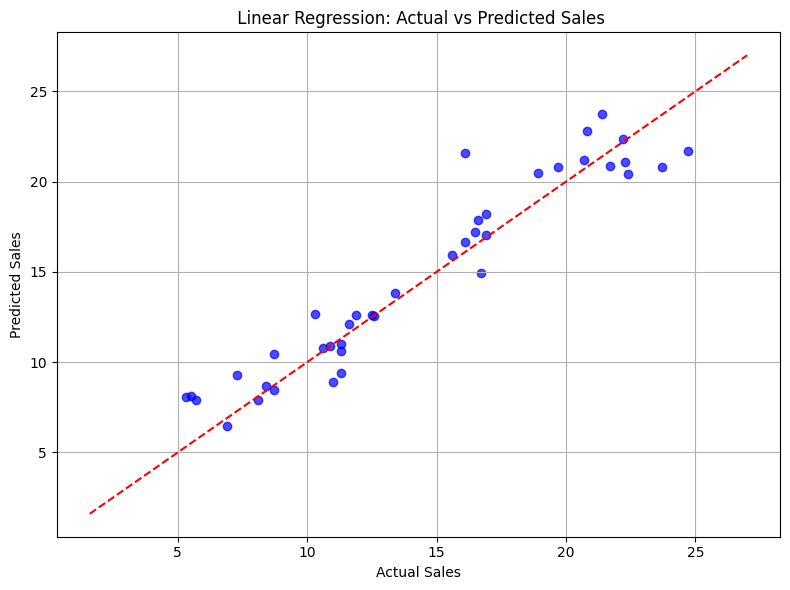

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title(' Linear Regression: Actual vs Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

Predicting for new input [TV=200, Radio=40, Newspaper=50]

In [34]:
new_data = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})
new_prediction = model_all.predict(new_data)
print(f"\n Predicted Sales for [TV=200, Radio=40, Newspaper=50]: {new_prediction[0]:.2f}")


 Predicted Sales for [TV=200, Radio=40, Newspaper=50]: 19.87


Model with Normalization

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = model_scaled.predict(X_test_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
print(f"\n R² score after normalization: {r2_scaled:.4f}")


 R² score after normalization: 0.9059


Model using only Radio and Newspaper

In [25]:
X_subset = df[['Radio', 'Newspaper']]
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset, y, test_size=0.2, random_state=42)

model_subset = LinearRegression()
model_subset.fit(X_train_sub, y_train_sub)
y_pred_subset = model_subset.predict(X_test_sub)
r2_subset = r2_score(y_test_sub, y_pred_subset)
print(f"\n R² score using only Radio and Newspaper: {r2_subset:.4f}")


 R² score using only Radio and Newspaper: 0.1100
